In [1]:
# Importing the required modules for data analysis
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt




# DATA EXPLORATION

In [2]:
# reading the text file and using single column for date and time
df = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':['Date','Time']}, index_col=['datetime'])
print(df.shape)
print(df.head())

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

In [3]:
df.info()  # checking for the datatypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [4]:
df = df.apply(pd.to_numeric, errors='coerce')   # converting the object data type to float
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [5]:
# determining the energy consumption of house from all the three submeters
df['energy_consumption'] = (df['Global_active_power'] * 1000 / 60) - (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])


In [6]:
df.info()   # checking the data type

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
energy_consumption       float64
dtypes: float64(8)
memory usage: 142.5 MB


In [7]:
df.describe()  # checking the iportant statistical values of data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumption
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [8]:
df.shape

(2075259, 8)

In [9]:
# Importing the keras module
import numpy as np
from numpy import array
from keras import layers
from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten
from keras.utils import print_summary,to_categorical
import pandas as pd
from keras.models import Sequential 
from keras.callbacks import ModelCheckpoint
import keras.backend as K
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional

Using TensorFlow backend.


# DATA ANALYSIS

In [10]:
# checking for nan values in columns
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
energy_consumption       25979
dtype: int64

In [11]:
# filling the Nan values with mean
for j in range(0,8):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [12]:
# again checking for the nan values
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
energy_consumption       0
dtype: int64

In [13]:
# calculating sum of total energy consumed in each month by resampling
df['energy_consumption'].resample('M').sum() 

datetime
2006-12-31    457802.292107
2007-01-31    684931.329387
2007-02-28    559038.062720
2007-03-31    525153.848027
2007-04-30    351038.369848
2007-05-31    356164.200000
2007-06-30    276652.331812
2007-07-31    242684.058157
2007-08-31    257075.256586
2007-09-30    343402.396053
2007-10-31    434079.462720
2007-11-30    507817.029387
2007-12-31    690634.814693
2008-01-31    649318.681360
2008-02-29    469456.477413
2008-03-31    504462.214693
2008-04-30    389870.866667
2008-05-31    359438.629387
2008-06-30    293462.181360
2008-07-31    272351.929387
2008-08-31     99914.629387
2008-09-30    329881.866667
2008-10-31    462133.531812
2008-11-30    603994.165573
2008-12-31    555981.209891
2009-01-31    571967.114693
2009-02-28    443682.973705
2009-03-31    470899.396053
2009-04-30    406330.362720
2009-05-31    348817.425440
2009-06-30    268686.061379
2009-07-31    211187.992107
2009-08-31    228602.125070
2009-09-30    316211.010747
2009-10-31    415525.981360
2009-11-30 

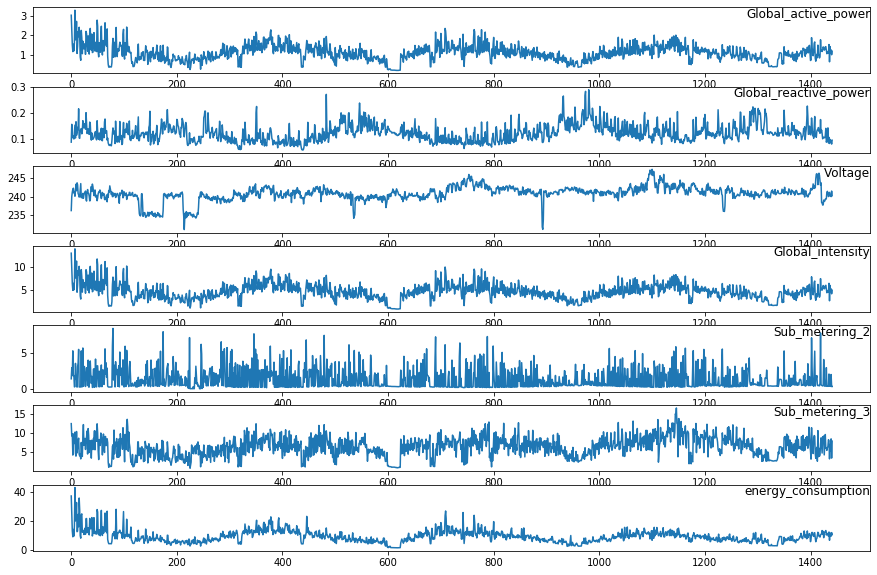

In [14]:
# analysing the mean of different features sampled over a day for different columns 
cols = [0, 1, 2, 3, 5, 6,7]
i = 1
values = df.resample('D').mean().values  # resampling the values for Days
#subplotting each column
plt.figure(figsize=(15, 10))
for j in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, j])
    plt.title(df.columns[j], y=0.75, loc='right')
    i += 1
plt.show()

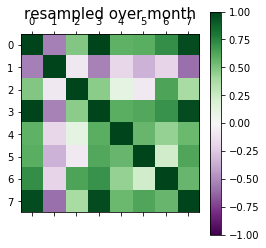

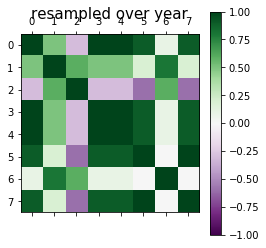

In [15]:
# from the above graphs it is analysed that the voltage is almost constant which can be important feature
# Correlations of mean of features resampled over months and year

plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

# MODEL BUILDING USING CONVOLUTION 1D AND LSTM

In [16]:
# the supervised learning problem is framed for predicting the energy_consumption at the current time (t) given the energy_consumption measurement and other features at the prior time step.
def supervised_(data, n_i=1, n_o=1, dropnan=True):        # scaled data between 0-1 
    n_vars = 1 if type(data) is list else data.shape[1]     
    file = pd.DataFrame(data)                               # making scaled data into dataframe of 1442 rows and 8 columns
    cols, labels = list(), list()                # creating columns and labels for analysing past input 
# input sequence (t-n, ... t-1)
    for i in range(n_i, 0, -1):
        cols.append(file.shift(i))             # appending the values in column list
        labels += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]   # using the labels in format of t-n
# forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_o):
        cols.append(file.shift(-i))
        if i == 0:
            labels += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            labels += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # concatinating the all values
    ad = pd.concat(cols, axis=1)
    ad.columns = labels
    # drop rows with NaN values
    if dropnan:
        ad.dropna(inplace=True)
    return ad

In [17]:
# resampling the data over an hour to reduce number of samples for computation reduction
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 8)

In [18]:
from sklearn import preprocessing 
values = df_resample.values
values = values.astype('float32')
scaler =preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = supervised_(scaled, 1, 1)
#reframed.head()
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13,14]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283801   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315988   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)  var8(t-1)   var8(t)  
1   0.782418   0.813346  0.560592  
2   0.782676   0.560592  0.585814  
3   0.774169   0.585814  0.572244  
4   0.778809   0.572244  0.503143  
5   0.798917   0.503143  0.484145  


In [19]:
# split into train and test sets
values=reframed.values

n_train_time = 34000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 


(34000, 1, 8) (34000,) (588, 1, 8) (588,)


W1018 23:13:12.964606  4340 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\Admin\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=64, kernel_size=4, strides=1, activation="linear", padding="same")`
  """
C:\Users\Admin\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=64, kernel_size=4, strides=1, activation="relu", padding="same")`
  
W1018 23:13:13.057672  4340 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1018 23:13:13.097702  4340 deprecation_wrapper.py:119] From

Train on 34000 samples, validate on 588 samples
Epoch 1/20
 - 162s - loss: 0.0105 - val_loss: 0.0075
Epoch 2/20
 - 31s - loss: 0.0070 - val_loss: 0.0074
Epoch 3/20
 - 31s - loss: 0.0071 - val_loss: 0.0073
Epoch 4/20
 - 31s - loss: 0.0069 - val_loss: 0.0073
Epoch 5/20
 - 31s - loss: 0.0070 - val_loss: 0.0072
Epoch 6/20
 - 31s - loss: 0.0069 - val_loss: 0.0072
Epoch 7/20
 - 31s - loss: 0.0069 - val_loss: 0.0072
Epoch 8/20
 - 31s - loss: 0.0069 - val_loss: 0.0072
Epoch 9/20
 - 31s - loss: 0.0069 - val_loss: 0.0071
Epoch 10/20
 - 31s - loss: 0.0068 - val_loss: 0.0071
Epoch 11/20
 - 31s - loss: 0.0068 - val_loss: 0.0071
Epoch 12/20
 - 31s - loss: 0.0068 - val_loss: 0.0071
Epoch 13/20
 - 32s - loss: 0.0068 - val_loss: 0.0071
Epoch 14/20
 - 31s - loss: 0.0068 - val_loss: 0.0071
Epoch 15/20
 - 31s - loss: 0.0068 - val_loss: 0.0071
Epoch 16/20
 - 31s - loss: 0.0067 - val_loss: 0.0071
Epoch 17/20
 - 31s - loss: 0.0068 - val_loss: 0.0071
Epoch 18/20
 - 32s - loss: 0.0067 - val_loss: 0.0071
Epoch 

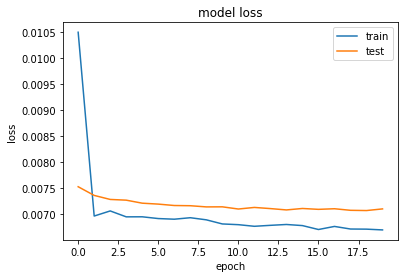

In [20]:
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from math import sqrt
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, strides=1, border_mode='same',activation='linear'))
model.add(Bidirectional(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2]),activation='relu',return_sequences=True)))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=4, strides=1, border_mode='same',activation='relu'))
model.add(Bidirectional(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]),activation='relu',return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]),activation='relu',return_sequences=True)))
model.add(Dropout(0.3))
model.add(Dense(128,activation='tanh'))
model.add(Flatten())
model.add(Dense(1,activation='linear'))          
model.compile(optimizer='adam', loss='mean_squared_error')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 8))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [21]:
# calculate Root Mean Square Error
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.542


In [ ]:
# The model can be improved by using more CNN layers and other neural nets algorithm